In [2]:
import numpy as np
import matplotlib.pyplot as plt

import struct
from tqdm import tqdm
import math as m
import h5py

In [3]:
import pandas as pd
import sys, os

sys.path.append("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/MULE")

from packs.core import io as io

In [4]:
x = io.load_evt_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/reproducibility_processed/RUN1_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304134507-10.h5")

In [5]:
display(x)

,event_number,timestamp,samples,sampling_period,channels
0,2,850374929,501,16,1
1,3,850382195,501,16,1
2,4,1130583075,501,16,1
3,5,1300243023,501,16,1
4,6,1443685059,501,16,1
...,...,...,...,...,...
20824,24697,74200191681,501,16,1
20825,24698,74200193807,501,16,1
20826,24699,74203580173,501,16,1
20827,24701,74206854763,501,16,1


In [6]:
y = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/reproducibility_processed/RUN1_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304134507-10.h5", samples = 501)
display(y)

,event_number,channels,rwf
0,2,0,"[-34.188034, -34.188034, -34.188034, -34.18803..."
1,3,0,"[-34.188034, -33.699635, -33.211235, -33.21123..."
2,4,0,"[-33.699635, -33.699635, -33.211235, -33.69963..."
3,5,0,"[-32.72283, -33.211235, -33.211235, -33.211235..."
4,6,0,"[-33.699635, -33.699635, -33.699635, -33.21123..."
...,...,...,...
20824,24697,0,"[-33.211235, -32.72283, -33.211235, -33.211235..."
20825,24698,0,"[-33.699635, -33.211235, -34.188034, -33.69963..."
20826,24699,0,"[-32.234432, -31.74603, -31.74603, -32.234432,..."
20827,24701,0,"[-32.234432, -32.234432, -32.234432, -32.23443..."


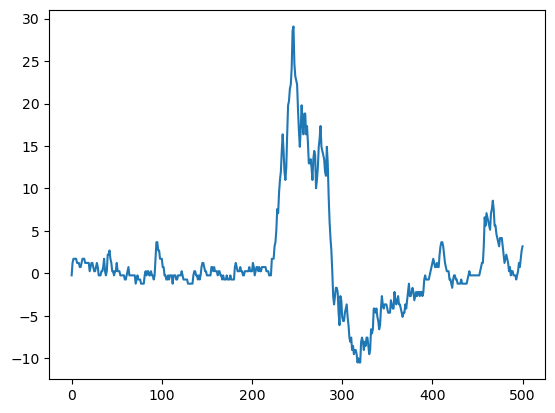

In [7]:
baseline_subtracted = y.copy(deep=True)

for i in range(len(baseline_subtracted.rwf)):
    baseline = np.mean(baseline_subtracted.rwf[i][150:200])
    baseline_subtracted.at[i, 'rwf'] = baseline_subtracted.rwf[i] - baseline

plt.plot(baseline_subtracted.rwf[250])
#plt.plot(baseline_subtracted.rwf[0])


In [8]:
interval = 8.016*10**-6 / len(baseline_subtracted.rwf[0])

areas = np.zeros(len(baseline_subtracted.rwf))

for i in range(len(baseline_subtracted.rwf)):
    for j in range(len(baseline_subtracted.rwf[i])):
        if baseline_subtracted.rwf[i][j] > 0:
            areas[i] += baseline_subtracted.rwf[i][j] * interval

Text(0.5, 1.0, 'Initial Larger Component - RUN1')

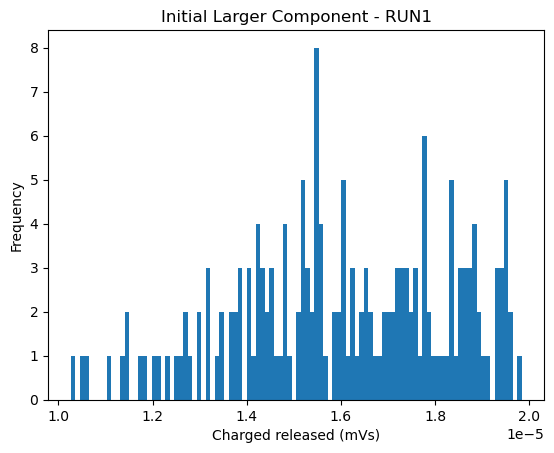

In [9]:
areas_filtered = areas[areas < 0.00002]
areas_filtered = areas_filtered[areas_filtered > 0.00001]
#areas_filtered = areas_filtered[areas_filtered > 0.00001]
hist = plt.hist(areas_filtered, bins=100)
plt.xlabel("Charged released (mVs)")
plt.ylabel("Frequency")
plt.title("Initial Larger Component - RUN1")

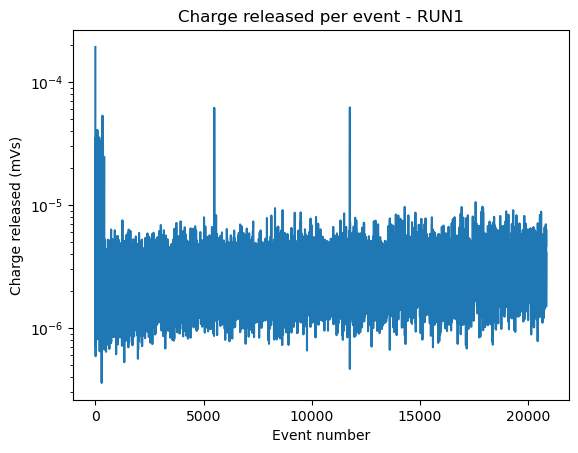

In [26]:
plt.plot(areas)
plt.xlabel("Event number")
plt.title("Charge released per event - RUN1")
plt.ylabel("Charge released (mVs)")
plt.yscale('log')

#plt.ylim(0,0.00001)

In [11]:
def reprod_avg(filename, run, disp=False):
    
    x = io.load_evt_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/reproducibility_processed/" + filename)
    if disp == True: display(x)
    y = io.load_rwf_info("C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/reproducibility_processed/" + filename, samples = 501)
    if disp == True: display(y)

    baseline_subtracted = y.copy(deep=True)

    for i in range(len(baseline_subtracted.rwf)):
        baseline = np.mean(baseline_subtracted.rwf[i][150:200])
        baseline_subtracted.at[i, 'rwf'] = baseline_subtracted.rwf[i] - baseline
    
    interval = 8.016*10**-6 / len(baseline_subtracted.rwf[0])

    areas = np.zeros(len(baseline_subtracted.rwf))

    for i in range(len(baseline_subtracted.rwf)):
        for j in range(len(baseline_subtracted.rwf[i])):
            if baseline_subtracted.rwf[i][j] > 0:
                areas[i] += baseline_subtracted.rwf[i][j] * interval
    
    plt.plot(areas)
    plt.xlabel("Event number")
    plt.ylabel("Charge released (mVs)")
    plt.title("Charge released per event - RUN" + run)
    plt.show()

    stable_comp = areas[areas < 0.00001]
    hist = plt.hist(stable_comp, bins=100)
    plt.xlabel("Charged released (mVs)")
    plt.ylabel("Frequency")
    plt.title("Stable Component - RUN" + run)
    plt.show()

    large_comp = areas[areas < 0.00002]
    large_comp = large_comp[large_comp > 0.00001]
    hist = plt.hist(large_comp, bins=100)
    plt.xlabel("Charged released (mVs)")
    plt.ylabel("Frequency")
    plt.title("Initial Larger Component - RUN" + run)
    plt.show()

    stable_mean = np.mean(stable_comp)
    print(stable_mean)
    stable_stdev = np.std(stable_comp)
    print(stable_stdev)

    return areas, baseline_subtracted, stable_mean, stable_stdev


,event_number,timestamp,samples,sampling_period,channels
0,2,850374929,501,16,1
1,3,850382195,501,16,1
2,4,1130583075,501,16,1
3,5,1300243023,501,16,1
4,6,1443685059,501,16,1
...,...,...,...,...,...
20824,24697,74200191681,501,16,1
20825,24698,74200193807,501,16,1
20826,24699,74203580173,501,16,1
20827,24701,74206854763,501,16,1


,event_number,channels,rwf
0,2,0,"[-34.188034, -34.188034, -34.188034, -34.18803..."
1,3,0,"[-34.188034, -33.699635, -33.211235, -33.21123..."
2,4,0,"[-33.699635, -33.699635, -33.211235, -33.69963..."
3,5,0,"[-32.72283, -33.211235, -33.211235, -33.211235..."
4,6,0,"[-33.699635, -33.699635, -33.699635, -33.21123..."
...,...,...,...
20824,24697,0,"[-33.211235, -32.72283, -33.211235, -33.211235..."
20825,24698,0,"[-33.699635, -33.211235, -34.188034, -33.69963..."
20826,24699,0,"[-32.234432, -31.74603, -31.74603, -32.234432,..."
20827,24701,0,"[-32.234432, -32.234432, -32.234432, -32.23443..."


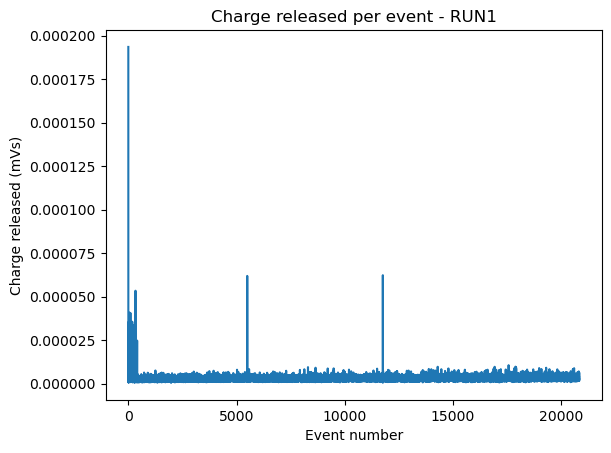

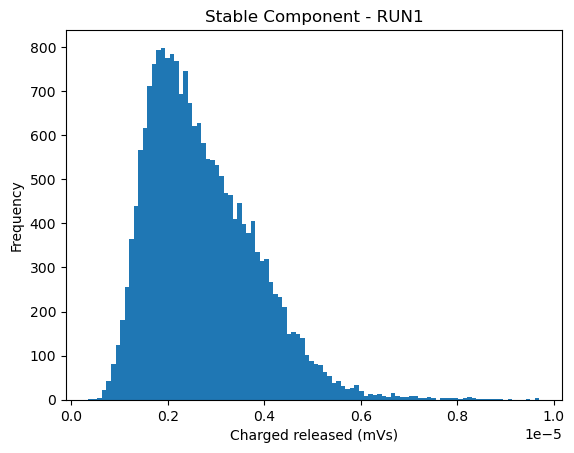

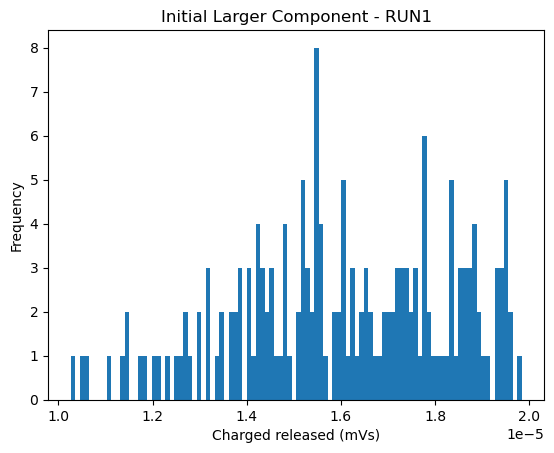

2.7198286930852297e-06
1.1196894653805955e-06


In [12]:
areas1, waveforms1, mean1, stdev1 = reprod_avg("RUN1_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304134507-10.h5", "1", disp=True)

,event_number,timestamp,samples,sampling_period,channels
0,2,2173101,501,16,1
1,7,7037703,501,16,1
2,10,11983703,501,16,1
3,12,16944407,501,16,1
4,15,21876763,501,16,1
...,...,...,...,...,...
17456,30376,117359466623,501,16,1
17457,30377,117367021121,501,16,1
17458,30378,117370682907,501,16,1
17459,30380,117374368773,501,16,1


,event_number,channels,rwf
0,2,0,"[-34.188034, -34.188034, -33.211235, -32.72283..."
1,7,0,"[-33.211235, -32.72283, -33.699635, -34.188034..."
2,10,0,"[-34.676434, -35.164837, -35.164837, -34.18803..."
3,12,0,"[-35.164837, -35.653236, -35.164837, -35.16483..."
4,15,0,"[-33.699635, -33.699635, -33.699635, -33.21123..."
...,...,...,...
17456,30376,0,"[-35.653236, -35.653236, -35.653236, -35.16483..."
17457,30377,0,"[-23.443224, -24.420025, -25.396826, -27.35042..."
17458,30378,0,"[-34.188034, -34.188034, -33.699635, -34.18803..."
17459,30380,0,"[-34.676434, -34.676434, -34.676434, -34.67643..."


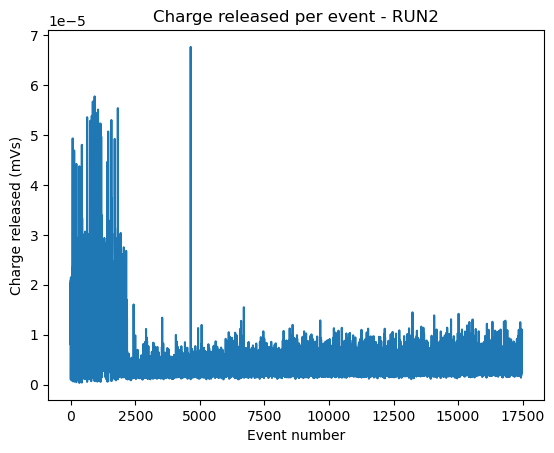

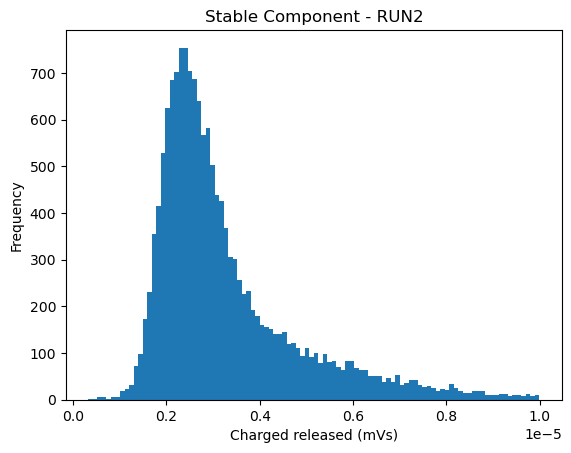

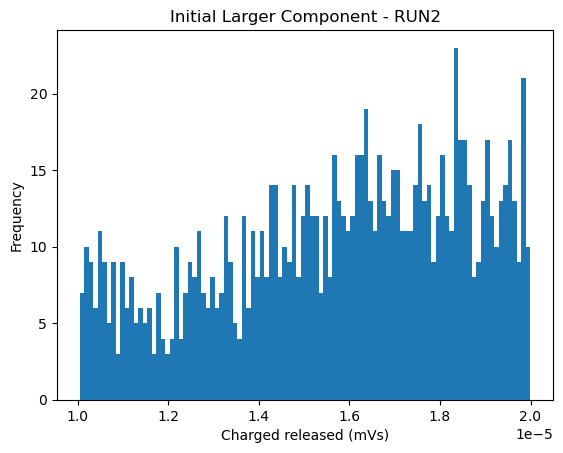

3.2703255192014255e-06
1.546220910938282e-06


In [13]:
areas2, waveforms2, mean2, stdev2 = reprod_avg("RUN2_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304140802-11.h5", "2", disp=True)

,event_number,timestamp,samples,sampling_period,channels
0,2,868486445,501,16,1
1,6,872539027,501,16,1
2,12,876776737,501,16,1
3,16,880972283,501,16,1
4,20,885247033,501,16,1
...,...,...,...,...,...
28200,33883,84741126199,501,16,1
28201,33884,84744372971,501,16,1
28202,33885,84747957965,501,16,1
28203,33886,84751348035,501,16,1


,event_number,channels,rwf
0,2,0,"[-33.699635, -33.699635, -33.699635, -33.69963..."
1,6,0,"[-33.211235, -33.211235, -31.74603, -32.234432..."
2,12,0,"[-33.211235, -33.699635, -34.188034, -34.18803..."
3,16,0,"[-32.72283, -33.211235, -33.211235, -32.72283,..."
4,20,0,"[-32.234432, -32.234432, -32.72283, -33.211235..."
...,...,...,...
28200,33883,0,"[-34.188034, -33.699635, -34.188034, -34.18803..."
28201,33884,0,"[-33.699635, -33.699635, -34.188034, -33.69963..."
28202,33885,0,"[-33.699635, -33.211235, -33.699635, -33.69963..."
28203,33886,0,"[-32.72283, -32.72283, -32.72283, -32.234432, ..."


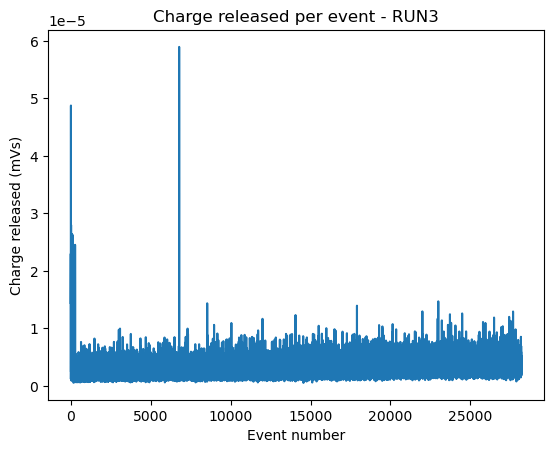

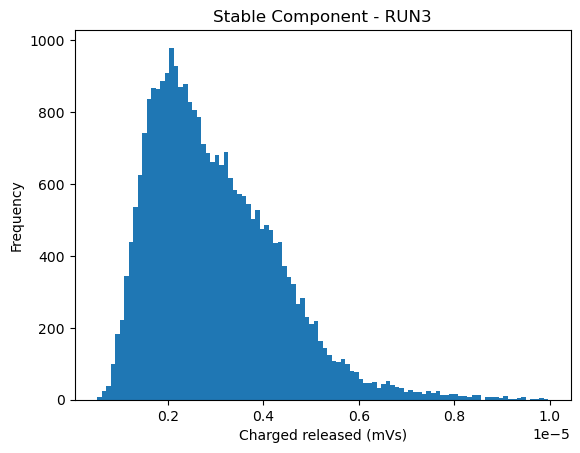

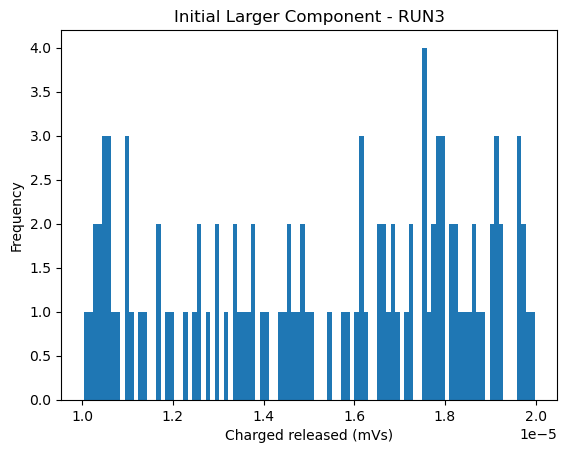

2.9868804821167337e-06
1.3434710094714074e-06


In [14]:
areas3, waveforms3, mean3, stdev3 = reprod_avg("RUN3_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304143956-12.h5", "3", disp=True)

,event_number,timestamp,samples,sampling_period,channels
0,2,1692038593,501,16,1
1,3,1692044839,501,16,1
2,5,1704366777,501,16,1
3,8,1704368019,501,16,1
4,9,1711090561,501,16,1
...,...,...,...,...,...
30287,37257,63856522249,501,16,1
30288,37258,63860126169,501,16,1
30289,37259,63860128573,501,16,1
30290,37260,63863589791,501,16,1


,event_number,channels,rwf
0,2,0,"[-35.164837, -35.164837, -35.164837, -35.65323..."
1,3,0,"[-33.699635, -34.188034, -34.676434, -34.18803..."
2,5,0,"[-34.676434, -34.676434, -34.676434, -33.69963..."
3,8,0,"[-31.74603, -31.257631, -31.257631, -31.74603,..."
4,9,0,"[-34.676434, -34.676434, -34.188034, -34.18803..."
...,...,...,...
30287,37257,0,"[-34.188034, -34.676434, -34.676434, -34.18803..."
30288,37258,0,"[-34.676434, -34.676434, -35.164837, -35.16483..."
30289,37259,0,"[-35.164837, -34.676434, -35.164837, -35.16483..."
30290,37260,0,"[-36.141636, -36.630035, -35.164837, -34.67643..."


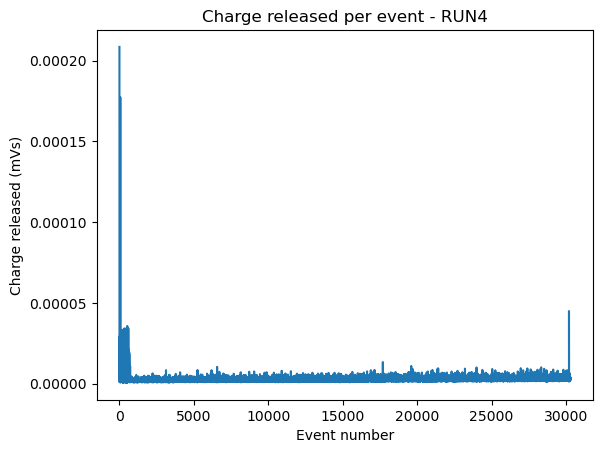

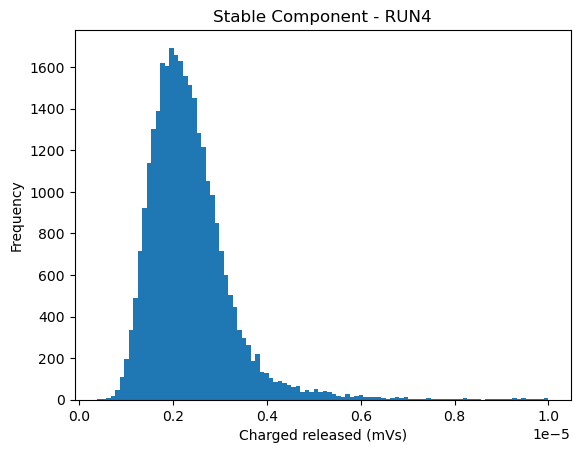

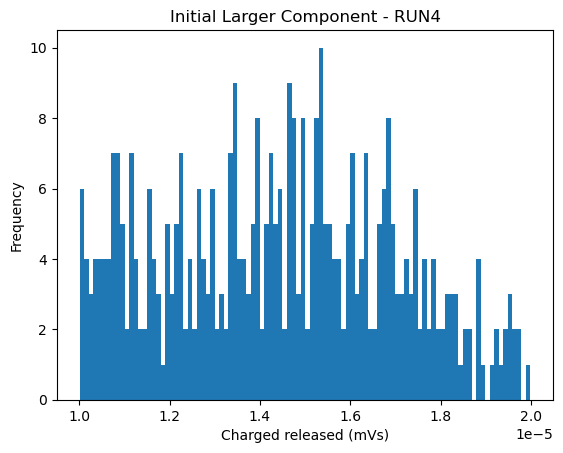

2.361872486835317e-06
9.1906563232972e-07


In [15]:
areas4, waveforms4, mean4, stdev4 = reprod_avg("RUN4_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304150622-13.h5", "4", disp=True)

,event_number,timestamp,samples,sampling_period,channels
0,2,302272673,501,16,1
1,4,310483787,501,16,1
2,5,316997485,501,16,1
3,8,323006929,501,16,1
4,11,328883641,501,16,1
...,...,...,...,...,...
4322,16524,62806639913,501,16,1
4323,16525,62811017673,501,16,1
4324,16526,64330328169,501,16,1
4325,16527,64343911081,501,16,1


,event_number,channels,rwf
0,2,0,"[-33.699635, -33.699635, -33.699635, -33.69963..."
1,4,0,"[-33.211235, -33.211235, -33.211235, -33.21123..."
2,5,0,"[-34.188034, -34.188034, -34.188034, -33.69963..."
3,8,0,"[-34.188034, -34.676434, -34.676434, -34.18803..."
4,11,0,"[-32.72283, -32.72283, -32.72283, -33.211235, ..."
...,...,...,...
4322,16524,0,"[-34.188034, -34.188034, -34.188034, -34.18803..."
4323,16525,0,"[-33.211235, -33.211235, -33.211235, -33.21123..."
4324,16526,0,"[-33.699635, -33.699635, -34.188034, -33.69963..."
4325,16527,0,"[-34.188034, -34.188034, -34.188034, -34.18803..."


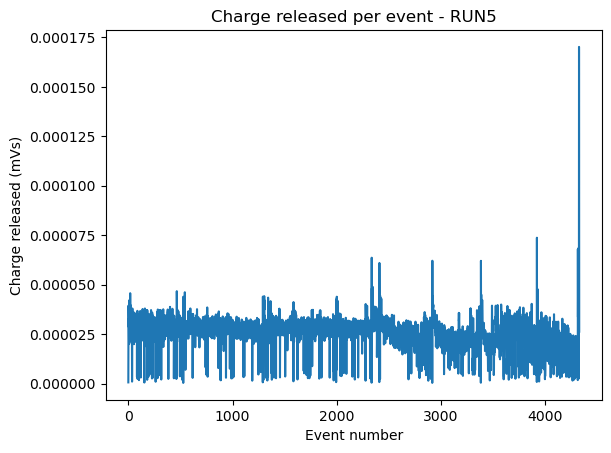

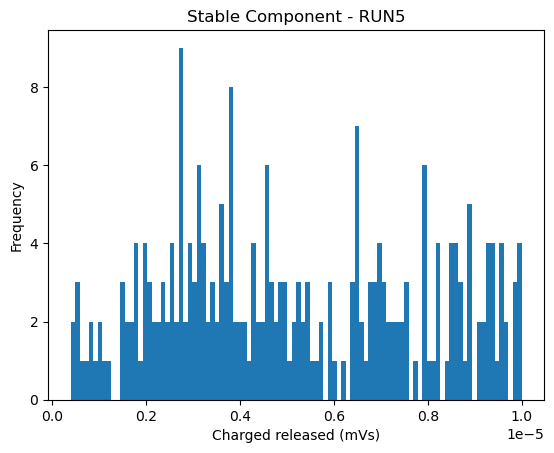

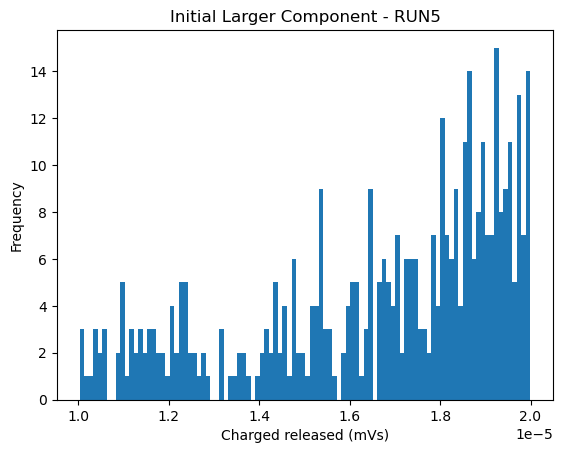

5.1581818827103576e-06
2.6774152681874267e-06


In [16]:
areas5, waveforms5, mean5, stdev5 = reprod_avg("RUN5_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304153412-14.h5", "5", disp=True)

,event_number,timestamp,samples,sampling_period,channels
0,2,358983,501,16,1
1,6,5318437,501,16,1
2,8,12327753,501,16,1
3,13,18942143,501,16,1
4,19,25087939,501,16,1
...,...,...,...,...,...
12099,21918,100214811333,501,16,1
12100,21919,100226149841,501,16,1
12101,21920,100237629995,501,16,1
12102,21921,100312372355,501,16,1


,event_number,channels,rwf
0,2,0,"[-32.72283, -33.211235, -33.699635, -34.188034..."
1,6,0,"[-34.676434, -34.676434, -34.676434, -35.16483..."
2,8,0,"[-34.676434, -35.164837, -35.164837, -34.67643..."
3,13,0,"[-34.188034, -33.211235, -33.211235, -33.21123..."
4,19,0,"[-35.653236, -35.653236, -35.653236, -35.65323..."
...,...,...,...
12099,21918,0,"[-34.188034, -33.699635, -34.676434, -34.18803..."
12100,21919,0,"[-34.188034, -33.699635, -33.211235, -33.69963..."
12101,21920,0,"[-33.699635, -34.188034, -33.699635, -34.18803..."
12102,21921,0,"[-32.234432, -31.74603, -30.28083, -31.257631,..."


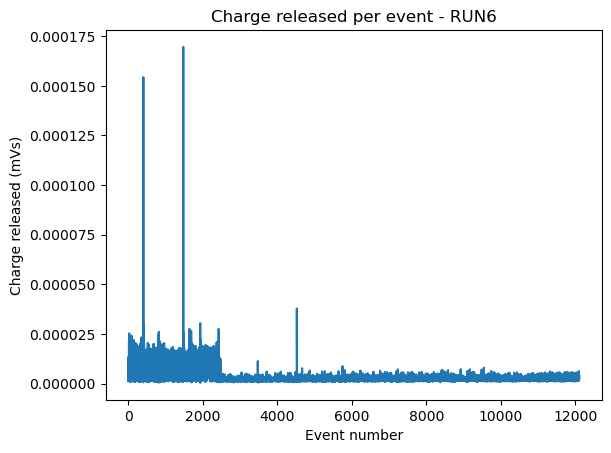

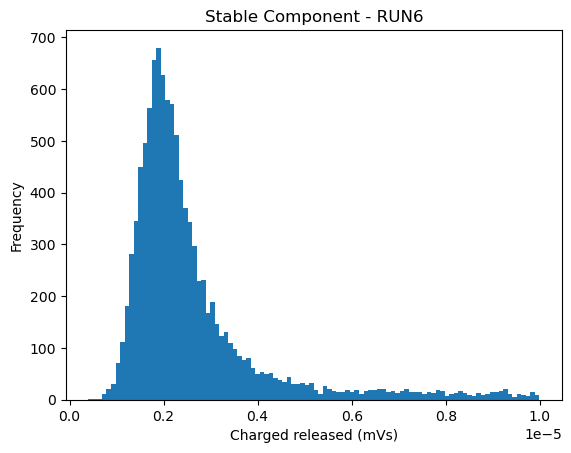

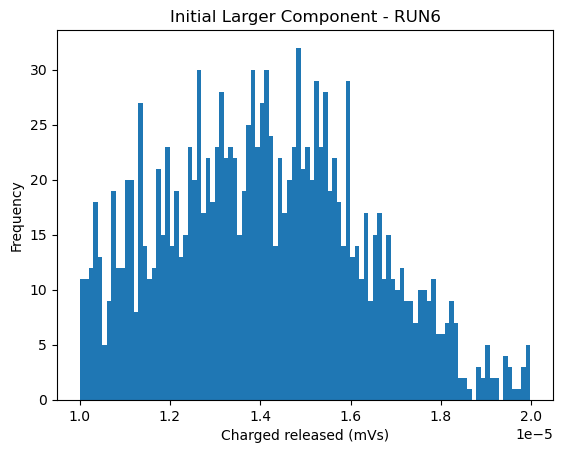

2.6284757704835083e-06
1.5520651098187902e-06


In [17]:
areas6, waveforms6, mean6, stdev6 = reprod_avg("RUN6_Air_1200V_FsC_dig1-DT5740-915_CH2_20250304160638-15.h5", "6", disp=True)

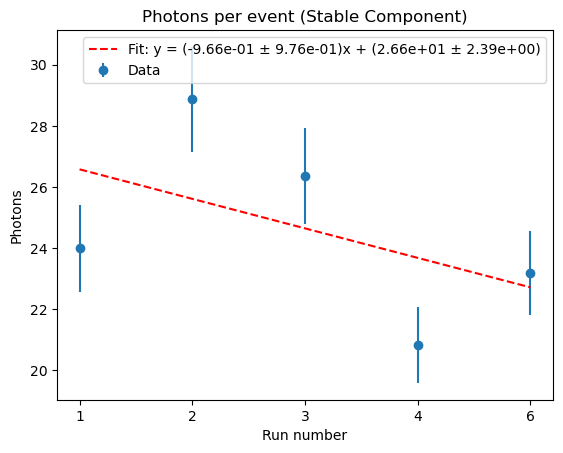

In [31]:
from scipy.stats import linregress

# Data (replace with actual values)
means = np.array([mean1, mean2, mean3, mean4, mean6])
photons = (means / 1e3 - 8.42e-12) / 1.13e-10
stdevs = np.array([
    stdev1 / np.sqrt(len(areas1)), 
    stdev2 / np.sqrt(len(areas2)), 
    stdev3 / np.sqrt(len(areas3)), 
    stdev4 / np.sqrt(len(areas4)), 
    stdev6 / np.sqrt(len(areas6))
])
photon_err = np.sqrt((stdevs / means) ** 2 + (6.71e-12 / 1.13e-10) ** 2) * photons + 1.11e-11

# Define x-values with even spacing
x_vals = np.arange(len(means))  # Even spacing: [0,1,2,3,4]
x_labels = [1, 2, 3, 4, 6]  # Actual labels

# Perform linear regression
slope, intercept, r_value, p_value, std_err_slope = linregress(x_vals, photons)

# Calculate error in the intercept
std_err_intercept = std_err_slope * np.sqrt(np.sum(x_vals**2) / len(x_vals))

# Generate fitted values for the trendline
x_fit = np.linspace(min(x_vals), max(x_vals), 100)  # Smooth line
y_fit = slope * x_fit + intercept

# Plot data points with error bars
plt.errorbar(x_vals, photons, yerr=photon_err, fmt='o', label="Data")

# Plot best-fit line
plt.plot(x_fit, y_fit, 'r--', label=f'Fit: y = ({slope:.2e} ± {std_err_slope:.2e})x + ({intercept:.2e} ± {std_err_intercept:.2e})')

# Customize x-axis labels
plt.xticks(x_vals, x_labels)

# Labels and title
plt.xlabel("Run number")
plt.ylabel("Photons")
plt.title("Photons per event (Stable Component)")
plt.legend()

# Annotate fit parameters
#text_x = min(x_vals) + 0.1 * (max(x_vals) - min(x_vals))  # Position text in the plot
#text_y = min(photons) + 0.1 * (max(photons) - min(photons))

#plt.annotate(f"Slope = ({slope:.2e} ± {std_err_slope:.2e})", xy=(text_x, text_y), fontsize=10)
#plt.annotate(f"Intercept = ({intercept:.2e} ± {std_err_intercept:.2e})", xy=(text_x, text_y - 0.05 * (max(photons) - min(photons))), fontsize=10)

plt.show()